# Figure 5 

Figure 5. Cross-sections of shortwave, longwave and net all-sky radiative heating visualized by a logarithmic color scale for shallow cumulus
clouds southwest of the cyclone center. The upper row shows 3D calculations, the middle row shows 1D calculations, and the lower row
shows the differences between the 3D and 1D calculations. The cross sections are at domain local hour 16:30 and -11.5° longitude and
between 37.5° and 38° north. The solar zenith angle is 65°. Note that the impression of a lower solar zenith angle in the figure is due to the
aspect ratio of the figures

---
@ Behrooz Keshtgar, KIT 2024

## 1- load python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import colorlegend
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap,SymLogNorm
import warnings
warnings.filterwarnings("ignore")

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.23.5
matplotlib: 3.3.0


## 2- Loading datasets

In [10]:
ds_mystic = xr.open_dataset('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/shallow_cumulus/libradtran_pp_mystic_RH_Fu.nc')
ds_mystic_ica = xr.open_dataset('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/shallow_cumulus/libradtran_pp_mystic_ica_RH_Fu.nc')

ds_mystic['lat'] = np.linspace(37,43,1686)
ds_mystic_ica['lat'] = np.linspace(37,43,1686)
#lon = np.linspace(22,28,2064)
ds_mystic = ds_mystic.sel(lat=slice(37.5,38)).isel(lon=1550)
ds_mystic_ica = ds_mystic_ica.sel(lat=slice(37.5,38)).isel(lon=1550)

### For data publication

In [13]:
# creating a dataset and save for data publication
ds_out = xr.Dataset(
    data_vars={
        "swrh_3d"     : (ds_mystic['swrh'].dims, ds_mystic['swrh'].data),
        "lwrh_3d"     : (ds_mystic['lwrh'].dims, ds_mystic['lwrh'].data),
        "swrh_1d"     : (ds_mystic_ica['swrh'].dims, ds_mystic_ica['swrh'].data),
        "lwrh_1d"     : (ds_mystic_ica['lwrh'].dims, ds_mystic_ica['lwrh'].data),
        
    },
    coords=ds_mystic['swrh'].coords)
ds_out = ds_out.assign(z_mc=ds_mystic['z_mc'])

ds_out.attrs['description'] = ' Cross-sections of RH at hour 16:30 and -11.5° longitude for 3D and 1D radiative transfer calculations in the shallow cumulus domain'
ds_out.to_netcdf('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/for_publication/figure5.nc')

In [3]:
ds_out = xr.open_dataset('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/for_publication/figure5.nc')

## 3- Plot

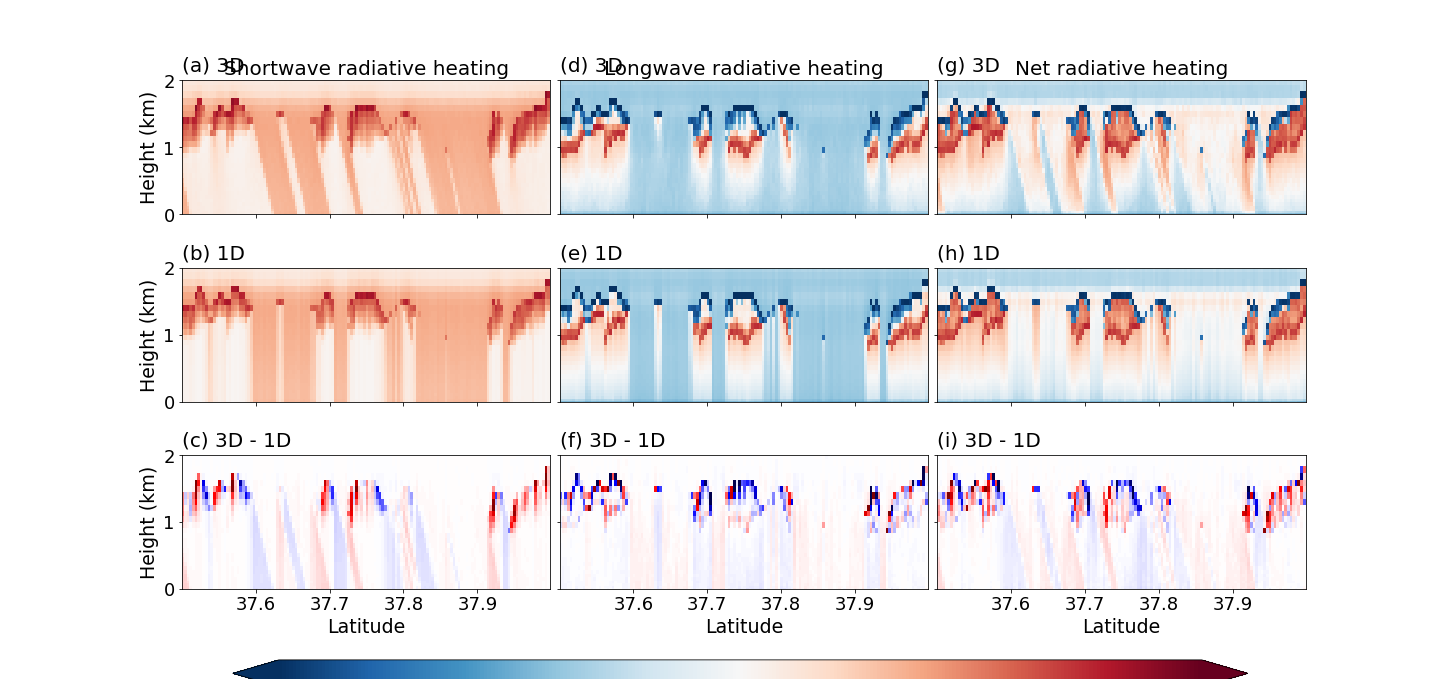

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 8))

# coordinates for plotting
lat = ds_out['lat']
height = ds_out['z_mc']
cbar_ticks = [-100, -10, -1, 0, 1, 10, 100]

#colors = plt.cm.RdBu_r(np.linspace(0.5, 1, 128))
# Create a custom colormap
#custom_cmap = LinearSegmentedColormap.from_list('CustomRdBuReds', colors)

i = 0

for ax in axes.flat:
    ax.tick_params(labelsize=18)
    #ax.set_xlim([37.5,38])
    ax.set_ylim([0,2])
    
    ##########################################
    # Shortwave
    ##########################################
    if i == 0:
        Z = ds_out['swrh_3d'].transpose().values
        im1 = ax.pcolor(lat,height,Z,norm=SymLogNorm(linthresh=1, linscale=1,vmin=-100, vmax=100),cmap='RdBu_r', shading='auto')
        ax.set_ylabel('Height (km)', fontsize=19)
        ax.set_title('Shortwave radiative heating', fontsize=20)
        ax.set_xticklabels([])
        ax.text(0.0, 1.065, '(a) 3D', transform=ax.transAxes, 
            size=20)
        
    if i == 3:
        Z = ds_out['swrh_1d'].transpose().values
        im1 = ax.pcolor(lat,height,Z,norm=SymLogNorm(linthresh=1, linscale=1,vmin=-100, vmax=100),cmap='RdBu_r', shading='auto')
        ax.set_ylabel('Height (km)', fontsize=19)
        ax.set_xticklabels([])
        ax.text(0.0, 1.065, '(b) 1D', transform=ax.transAxes, 
            size=20)
        
    if i == 6:
        diff = (ds_out['swrh_3d']-ds_out['swrh_1d']).transpose().values
        im2 = ax.pcolor(lat,height,diff,vmin=-20,vmax=20,cmap='seismic', shading='auto')
        ax.set_ylabel('Height (km)', fontsize=19)
        ax.text(0.0, 1.065, '(c) 3D - 1D', transform=ax.transAxes, 
            size=20)
        ax.set_xlabel('Latitude', fontsize=19)
        
    ##########################################
    # Shortwave
    ##########################################
    if i == 1:
        Z = ds_out['lwrh_3d'].transpose().values
        im3 = ax.pcolor(lat,height,Z,norm=SymLogNorm(linthresh=1, linscale=1,vmin=-100, vmax=100),cmap='RdBu_r', shading='auto')
        ax.set_title('Longwave radiative heating', fontsize=20)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.text(0.0, 1.065, '(d) 3D', transform=ax.transAxes, 
            size=20)
        
    if i == 4:
        Z = ds_out['lwrh_1d'].transpose().values
        im3 = ax.pcolor(lat,height,Z,norm=SymLogNorm(linthresh=1, linscale=1,vmin=-100, vmax=100),cmap='RdBu_r', shading='auto')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.text(0.0, 1.065, '(e) 1D', transform=ax.transAxes, 
            size=20)
        
    if i == 7:
        diff = (ds_out['lwrh_3d']-ds_out['lwrh_1d']).transpose().values
        im4 = ax.pcolor(lat,height,diff,vmin=-20,vmax=20,cmap='seismic', shading='auto')
        ax.text(0.0, 1.065, '(f) 3D - 1D', transform=ax.transAxes, 
            size=20)
        ax.set_xticks([37.6,37.7,37.8,37.9])
        ax.set_yticklabels([])
        ax.set_xlabel('Latitude', fontsize=19)
        
    ##########################################
    # Net
    ##########################################    
        
    if i == 2:
        net = (ds_out['swrh_3d']+ds_out['lwrh_3d']).transpose().values
        im5 = ax.pcolor(lat,height,net,norm=SymLogNorm(linthresh=1, linscale=1,vmin=-100, vmax=100),cmap='RdBu_r', shading='auto')
        ax.text(0.0, 1.065, '(g) 3D', transform=ax.transAxes, 
            size=20)
        ax.set_title('Net radiative heating', fontsize=20)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
    if i == 5:
        net = (ds_out['swrh_1d']+ds_out['lwrh_1d']).transpose().values
        im5 = ax.pcolor(lat,height,net,norm=SymLogNorm(linthresh=1, linscale=1,vmin=-100, vmax=100),cmap='RdBu_r', shading='auto')
        ax.text(0.0, 1.065, '(h) 1D', transform=ax.transAxes, 
            size=20)
        
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
        cb_ax = fig.add_axes([0.16, -0.02, 0.7, 0.04]) # xcenter/ycenter/width/height
        cbar = fig.colorbar(im5,cax=cb_ax,orientation='horizontal',shrink=0.95,extend='both')
        cbar.set_label(label='radiative heating (K day$^{-1}$)', size='17',labelpad=0.1)
        cbar.ax.tick_params(labelsize=17)
        # Set colorbar ticks and labels
        cbar.set_ticks(cbar_ticks)
        cbar.set_ticklabels(cbar_ticks)
        ax.set_yticklabels([])
        
    if i == 8:
        net3d = (ds_out['swrh_3d']+ds_out['lwrh_3d']).transpose().values
        net1d = (ds_out['swrh_1d']+ds_out['lwrh_1d']).transpose().values
        diff = net3d - net1d
        im6 = ax.pcolor(lat,height,diff,vmin=-20,vmax=20,cmap='seismic', shading='auto')
        ax.text(0.0, 1.065, '(i) 3D - 1D', transform=ax.transAxes, 
            size=20)
        
        cb_ax = fig.add_axes([0.16, -0.15, 0.7, 0.04]) # xcenter/ycenter/width/height
        cbar = fig.colorbar(im6,cax=cb_ax,orientation='horizontal',shrink=0.95,extend='both')
        cbar.set_label(label='radiative heating difference (K day$^{-1}$)', size='17',labelpad=0.1)
        cbar.ax.tick_params(labelsize=17)   
        ax.set_yticklabels([])
        ax.set_xlabel('Latitude', fontsize=19)
        
    i = i + 1     
    
fig.subplots_adjust(wspace=0.025, hspace=0.4)
plt.savefig('figure5.png', bbox_inches = 'tight',dpi=300)
plt.savefig('figure5.pdf', format='pdf', bbox_inches='tight', dpi=300, compression=6)